In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Get data from Prism files

### Get data for predict-then-optimize, Sfp

In [90]:
predict_sfp = pd.read_csv('FIG3CD/Predict-then-Optimize_Sfp.csv',header=None)
predict_sfp = predict_sfp.iloc[:,0:2] # get rid of extraneous third column
predict_sfp.columns = ['x','y']
predict_sfp = predict_sfp[~predict_sfp.isnull().all(axis=1)] # get rid of rows with all NaN
predict_sfp.head()

,x,y
0,-16.83725,-3.135146
6,-16.70545,-2.535731
8,-16.61805,-2.141162
10,-16.38036,-2.782930
22,-15.99536,-2.780348


### Data for mutation, Sfp

In [91]:
mutation_sfp = pd.read_csv('FIG3CD/Mutation_Sfp.csv') # Use first row as header
mutation_sfp.head()

,Unnamed: 0,Mutation,Mutation.1
0,NaN,NaN,NaN
1,-13.96208,-12.6828,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [92]:
mutation_sfp = mutation_sfp.iloc[:,0:2] # get rid of extraneous third column
mutation_sfp.columns = ['x','y']
mutation_sfp = mutation_sfp[~mutation_sfp.isnull().all(axis=1)] # get rid of rows with all NaN
mutation_sfp.head()

,x,y
1,-13.96208,-12.682800
5,-13.49027,-14.675290
11,-12.60430,-15.903180
12,-12.54038,-13.889620
13,-12.50728,8.268995


### Get data for POOL, Sfp

In [93]:
pool_sfp = pd.read_csv('FIG3CD/POOL_Sfp.csv') # Use first row as header
pool_sfp.head()

,Unnamed: 0,POOL,POOL.1
0,-16.784350,-1.540635,NaN
1,14.884740,-6.117420,NaN
2,15.804820,-5.245312,NaN
3,9.606956,11.739710,NaN
4,-1.746474,7.507626,NaN


In [94]:
pool_sfp = pool_sfp.iloc[:,0:2] # get rid of extraneous third column
pool_sfp.columns = ['x','y']
# the pool rows don't have any NaNs
pool_sfp.head()

,x,y
0,-16.784350,-1.540635
1,14.884740,-6.117420
2,15.804820,-5.245312
3,9.606956,11.739710
4,-1.746474,7.507626


### Get original data, Sfp

In [95]:
data_sfp = pd.read_csv('FIG3CD/Data_Sfp.csv') # Use first row as header
data_sfp.head()

,Unnamed: 0,Data,Data.1
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,-13.81245,-12.66130,NaN
4,-13.81239,-11.33182,NaN


In [96]:
data_sfp = data_sfp.iloc[:,0:2] # get rid of extraneous third column
data_sfp.columns = ['x','y']
data_sfp = data_sfp[~data_sfp.isnull().all(axis=1)] # get rid of rows with all NaN
data_sfp.head()

,x,y
3,-13.81245,-12.661300
4,-13.81239,-11.331820
10,-13.78284,-12.478510
13,-13.47746,-11.426460
15,-13.36754,-7.241957


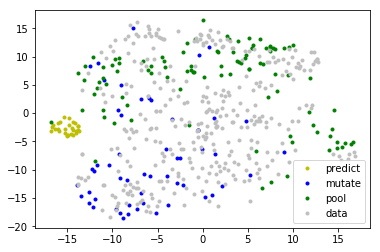

In [97]:
plt.plot(predict_sfp['x'],predict_sfp['y'],'y.')
plt.plot(mutation_sfp['x'],mutation_sfp['y'],'b.')
plt.plot(pool_sfp['x'],pool_sfp['y'],'g.')
plt.plot(data_sfp['x'],data_sfp['y'],'.',color='0.75')
plt.legend(['predict','mutate','pool','data'])

# Analyze distance

In [98]:
def closest_data(x,y,data):
    # pass either data_sfp or data_acps for data
    # looks for the closest point in data using the euclidean distance
    dist_sqr = (data['x']-x)**2 + (data['y']-y)**2
    min_dist = np.sqrt(dist_sqr.min())
    idx = dist_sqr.idxmin()
    return min_dist

In [99]:
def add_distances(method_df,data_df):
    method_df['closest_data_dist'] = pd.Series()
    for i,row in method_df.iterrows():
        method_df['closest_data_dist'][i]=closest_data(row['x'],row['y'],data_df)

In [100]:
add_distances(pool_sfp,data_sfp)
add_distances(mutation_sfp,data_sfp)

In [101]:
pool_sfp.head()

,x,y,closest_data_dist
0,-16.784350,-1.540635,6.573732
1,14.884740,-6.117420,1.131252
2,15.804820,-5.245312,1.933158
3,9.606956,11.739710,0.324621
4,-1.746474,7.507626,1.214992


In [102]:
mutation_sfp.head()

,x,y,closest_data_dist
1,-13.96208,-12.682800,0.151167
5,-13.49027,-14.675290,2.039597
11,-12.60430,-15.903180,1.909267
12,-12.54038,-13.889620,1.768313
13,-12.50728,8.268995,1.159326


In [103]:
pool_sfp['closest_data_dist'].describe()

count    100.000000
mean       1.262873
std        0.915517
min        0.139898
25%        0.665155
50%        1.098686
75%        1.625326
max        6.573732
Name: closest_data_dist, dtype: float64

In [104]:
mutation_sfp['closest_data_dist'].describe()

count    55.000000
mean      0.975974
std       0.588810
min       0.085083
25%       0.525773
50%       0.867929
75%       1.341982
max       2.397819
Name: closest_data_dist, dtype: float64

### Get data for AcpS, mutation

In [105]:
mutation_acps = pd.read_csv('FIG3CD/Mutation_AcpS.csv',header=None) # Include the first row as data
mutation_acps.head()

,0,1,2
0,-11.87362,6.317032,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,-11.37078,5.307384,NaN


In [106]:
mutation_acps = mutation_acps.iloc[:,0:2] # get rid of extraneous third column
mutation_acps.columns = ['x','y']
mutation_acps = mutation_acps[~mutation_acps.isnull().all(axis=1)] # get rid of rows with all NaN
mutation_acps.head()

,x,y
0,-11.87362,6.317032
4,-11.37078,5.307384
5,-11.15129,-14.711560
6,-11.11703,-6.761276
9,-10.70168,-14.536530


### Get data for AcpS, pool

In [107]:
pool_acps = pd.read_csv('FIG3CD/POOL_AcpS.csv')
pool_acps.head()

,Unnamed: 0,POOL,POOL.1
0,-0.978467,-22.449430,NaN
1,-3.296212,16.037320,NaN
2,-6.221781,0.424133,NaN
3,7.297190,1.978591,NaN
4,9.296268,4.432103,NaN


In [108]:
pool_acps = pool_acps.iloc[:,0:2] # get rid of extraneous third column
pool_acps.columns = ['x','y']
# no rows with NaN
pool_acps.head()

,x,y
0,-0.978467,-22.449430
1,-3.296212,16.037320
2,-6.221781,0.424133
3,7.297190,1.978591
4,9.296268,4.432103



### Get data for AcpS, original data

In [109]:
data_acps = pd.read_csv('FIG3CD/Data_AcpS.csv')
data_acps.head()

,Unnamed: 0,Data,Data.1
0,-13.84080,-11.238160,NaN
1,NaN,NaN,NaN
2,-13.46226,13.561240,NaN
3,-11.87508,1.987953,NaN
4,-11.69286,6.339345,NaN


In [110]:
data_acps = data_acps.iloc[:,0:2] # get rid of extraneous third column
data_acps.columns = ['x','y']
data_acps = data_acps[~data_acps.isnull().all(axis=1)] # get rid of rows with all NaN
data_acps.head()

,x,y
0,-13.84080,-11.238160
2,-13.46226,13.561240
3,-11.87508,1.987953
4,-11.69286,6.339345
5,-11.32310,-16.417800



### Get data for AcpS, predict-then-optimize

In [111]:
predict_acps = pd.read_csv('FIG3CD/Predict-then-Optimize_AcpS.csv')
predict_acps.head()

,Unnamed: 0,Predict-then-Optimize,Predict-then-Optimize.1
0,-2.037223,-20.12662,NaN
1,NaN,NaN,NaN
2,-1.963888,-20.22730,NaN
3,NaN,NaN,NaN
4,-1.948747,-20.01402,NaN


In [112]:
predict_acps = predict_acps.iloc[:,0:2] # get rid of extraneous third column
predict_acps.columns = ['x','y']
predict_acps = predict_acps[~predict_acps.isnull().all(axis=1)] # get rid of rows with all NaN
predict_acps.head()

,x,y
0,-2.037223,-20.12662
2,-1.963888,-20.22730
4,-1.948747,-20.01402
6,-1.933447,-21.34876
20,-1.323321,-19.66986


# Plot distances

In [113]:
add_distances(pool_acps,data_acps)
add_distances(mutation_acps,data_acps)

In [114]:
pool_acps.head()

,x,y,closest_data_dist
0,-0.978467,-22.449430,8.359893
1,-3.296212,16.037320,2.249968
2,-6.221781,0.424133,1.399524
3,7.297190,1.978591,1.172717
4,9.296268,4.432103,1.242169


In [115]:
mutation_acps.head()

,x,y,closest_data_dist
0,-11.87362,6.317032,0.182132
4,-11.37078,5.307384,1.081055
5,-11.15129,-14.711560,0.870275
6,-11.11703,-6.761276,0.085973
9,-10.70168,-14.536530,1.015213


In [116]:
pool_acps['closest_data_dist'].describe()

count    100.000000
mean       1.426394
std        1.118112
min        0.051303
25%        0.751702
50%        1.202234
75%        1.857230
max        8.359893
Name: closest_data_dist, dtype: float64

In [117]:
mutation_acps['closest_data_dist'].describe()

count    48.000000
mean      0.735236
std       0.500424
min       0.023165
25%       0.313512
50%       0.756718
75%       1.096556
max       2.192895
Name: closest_data_dist, dtype: float64

In [118]:
# Pull data for benchmark comparisons

In [119]:
# This data comes from jialei, at https://drive.google.com/drive/folders/0B-MxS9sxk3fjQTZqX0hqX0hEU0U
# The data is a number between 0 and 1, where 1 indicates a 100% success rate
benchmark_sfp = pd.read_csv('FIG3CD/benchmark_sfp_orthogonal.csv')
benchmark_acps = pd.read_csv('FIG3CD/benchmark_AcpS_orthogonal.csv')

In [120]:
benchmark_sfp.head()

,pool,mutate,predict_optimize
0,0.001490,0.000006,0.003415
1,0.014057,0.000008,0.006818
2,0.028596,0.000173,0.010210
3,0.030267,0.000268,0.013590
4,0.030772,0.000897,0.016959


In [121]:
benchmark_acps.head()

,pool,mutate,predict_optimize
0,4.247516e-07,0.000007,8.771902e-08
1,4.878478e-07,0.000184,1.754380e-07
2,3.562043e-06,0.000203,2.631570e-07
3,1.525973e-05,0.000419,3.508760e-07
4,2.772773e-05,0.000438,4.385950e-07


# make fancy plots

In [122]:
# discarded colors
"""
# no
pool_col='#8dd3c7'
predict_col='#ffffb3'
mutation_col='#bebada'

predict_col='#e41a1c'
mutation_col='#377eb8'
pool_col='#4daf4a'

predict_col = '#edf8b1'
mutation_col = '#7fcdbb'
pool_col = '#2c7fb8'

pool_col = '#7fc97f'
predict_col = '#beaed4'
mutation_col = '#fdc086'

# pretty good
pool_col = '#1b9e77'
predict_col = '#d95f02'
mutation_col = '#7570b3'

predict_col='#a6cee3'
pool_col='#1f78b4'
mutation_col='#b2df8a'
"""

"\n# no\npool_col='#8dd3c7'\npredict_col='#ffffb3'\nmutation_col='#bebada'\n\npredict_col='#e41a1c'\nmutation_col='#377eb8'\npool_col='#4daf4a'\n\npredict_col = '#edf8b1'\nmutation_col = '#7fcdbb'\npool_col = '#2c7fb8'\n\npool_col = '#7fc97f'\npredict_col = '#beaed4'\nmutation_col = '#fdc086'\n\n# pretty good\npool_col = '#1b9e77'\npredict_col = '#d95f02'\nmutation_col = '#7570b3'\n\npredict_col='#a6cee3'\npool_col='#1f78b4'\nmutation_col='#b2df8a'\n"

In [123]:
# colors from http://colorbrewer2.org/#type=qualitative&scheme=Accent&n=3
pool_col = '#ca0020'
predict_col = '#f4a582'
mutation_col='#0571b0'

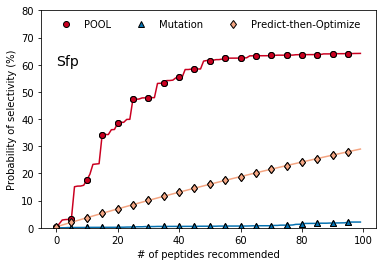

In [124]:
subset_to_plot = range(0,100,5)
plt.plot(benchmark_sfp['pool'][subset_to_plot]*100,'o',color=pool_col,markeredgecolor='k')
plt.plot(benchmark_sfp['mutate'][subset_to_plot]*100,'^',color=mutation_col,markeredgecolor='k')
plt.plot(benchmark_sfp['predict_optimize'][subset_to_plot]*100,'d',color=predict_col,markeredgecolor='k')

plt.plot(benchmark_sfp['pool']*100,'-',color=pool_col)
plt.plot(benchmark_sfp['mutate']*100,'-',color=mutation_col)
plt.plot(benchmark_sfp['predict_optimize']*100,'-',color=predict_col)

plt.plot(benchmark_sfp['pool'][subset_to_plot]*100,'o',color=pool_col,markeredgecolor='k')
plt.plot(benchmark_sfp['mutate'][subset_to_plot]*100,'^',color=mutation_col,markeredgecolor='k')
plt.plot(benchmark_sfp['predict_optimize'][subset_to_plot]*100,'d',color=predict_col,markeredgecolor='k')

plt.xlabel('# of peptides recommended')
plt.ylabel('Probability of selectivity (%)')
plt.text(0,60,'Sfp',fontsize=14)
plt.ylim(0,80)
plt.legend(['POOL','Mutation','Predict-then-Optimize'],frameon=False,loc='upper center',ncol=3)
plt.savefig('fig3a.eps')

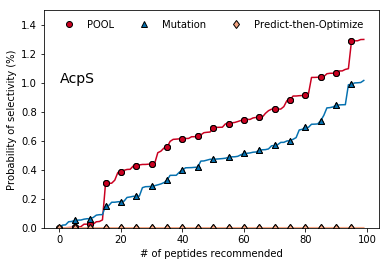

In [125]:
subset_to_plot = range(0,100,5)
plt.plot(benchmark_acps['pool'][subset_to_plot]*100,'o',color=pool_col,markeredgecolor='k')
plt.plot(benchmark_acps['mutate'][subset_to_plot]*100,'^',color=mutation_col,markeredgecolor='k')
plt.plot(benchmark_acps['predict_optimize'][subset_to_plot]*100,'d',color=predict_col,markeredgecolor='k')

plt.plot(benchmark_acps['pool']*100,'-',color=pool_col)
plt.plot(benchmark_acps['mutate']*100,'-',color=mutation_col)
plt.plot(benchmark_acps['predict_optimize']*100,'-',color=predict_col)

plt.plot(benchmark_acps['pool'][subset_to_plot]*100,'o',color=pool_col,markeredgecolor='k')
plt.plot(benchmark_acps['mutate'][subset_to_plot]*100,'^',color=mutation_col,markeredgecolor='k')
plt.plot(benchmark_acps['predict_optimize'][subset_to_plot]*100,'d',color=predict_col,markeredgecolor='k')

plt.xlabel('# of peptides recommended')
plt.ylabel('Probability of selectivity (%)')
plt.text(0,1.0,'AcpS',fontsize=14)
plt.ylim(0,1.5)
plt.legend(['POOL','Mutation','Predict-then-Optimize'],frameon=False,loc='upper center',ncol=3)
plt.savefig('fig3b.eps')

In [126]:
def closest_idx(x,y,data):
    # pass either data_sfp or data_acps for data
    # looks for the closest point in data using the euclidean distance
    dist_sqr = (data['x']-x)**2 + (data['y']-y)**2
    idx = dist_sqr.idxmin()
    return idx

def plot_lines(method_df,data_df,col):
    for i,row in method_df.iterrows():
        idx=closest_idx(row['x'],row['y'],data_df)
        x = data_df.loc[idx]['x']
        y = data_df.loc[idx]['y']
        plt.plot([row['x'],x],[row['y'],y],col,alpha=1,linewidth=1)

In [127]:
pool_mrk='o'
predict_mrk='d'
mutation_mrk='^'
data_mrk='s'
mrk_sz=4

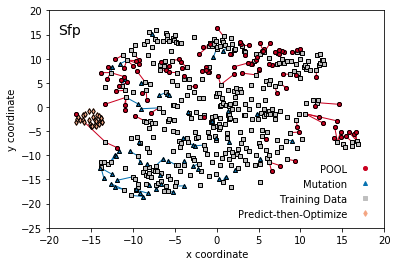

In [133]:
plt.plot(pool_sfp['x'],pool_sfp['y'],pool_mrk,color=pool_col,markersize=mrk_sz)
plt.plot(mutation_sfp['x'],mutation_sfp['y'],mutation_mrk,color=mutation_col,markersize=mrk_sz)
plt.plot(data_sfp['x'],data_sfp['y'],data_mrk,color='0.75',markersize=mrk_sz)
plt.plot(predict_sfp['x'],predict_sfp['y'],predict_mrk,color=predict_col,markersize=mrk_sz)

plot_lines(pool_sfp,data_sfp,pool_col)
plot_lines(mutation_sfp,data_sfp,mutation_col)

# Overplot with training data first so that everything goes on top of the lines,
# and pool and mutation last so they are the top-most layer
plt.plot(data_sfp['x'],data_sfp['y'],data_mrk,color='0.75',markersize=mrk_sz,markeredgecolor='k')
plt.plot(predict_sfp['x'],predict_sfp['y'],predict_mrk,color=predict_col,markersize=mrk_sz,markeredgecolor='k')
plt.plot(mutation_sfp['x'],mutation_sfp['y'],mutation_mrk,color=mutation_col,markersize=mrk_sz,markeredgecolor='k')
plt.plot(pool_sfp['x'],pool_sfp['y'],pool_mrk,color=pool_col,markersize=mrk_sz,markeredgecolor='k')

plt.legend(['POOL','Mutation','Training Data','Predict-then-Optimize'],frameon=False,markerfirst=False)

plt.xlim(-20,20)
plt.ylim(-25,20)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.text(-19,15,'Sfp',fontsize=14)
plt.savefig('fig3c.eps',transparent=True)

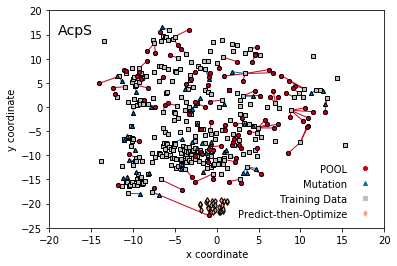

In [134]:
#plt.plot(pool_acps['x'],pool_acps['y'],'.',color=pool_col)
#plt.plot(mutation_acps['x'],mutation_acps['y'],'.',color=mutation_col)
#plt.plot(data_acps['x'],data_acps['y'],'.',color='0.75')
#plt.plot(predict_acps['x'],predict_acps['y'],'.',color=predict_col)
#plot_lines(pool_acps,data_acps,pool_col)
#plot_lines(mutation_acps,data_acps,mutation_col)

plt.plot(pool_acps['x'],pool_acps['y'],pool_mrk,color=pool_col,markersize=mrk_sz)
plt.plot(mutation_acps['x'],mutation_acps['y'],mutation_mrk,color=mutation_col,markersize=mrk_sz)
plt.plot(data_acps['x'],data_acps['y'],data_mrk,color='0.75',markersize=mrk_sz)
plt.plot(predict_acps['x'],predict_acps['y'],predict_mrk,color=predict_col,markersize=mrk_sz)

plot_lines(pool_acps,data_acps,pool_col)
plot_lines(mutation_acps,data_acps,mutation_col)

# Overplot with training data first so that everything goes on top of the lines,
# and pool and mutation last so they are the top-most layer
plt.plot(data_acps['x'],data_acps['y'],data_mrk,color='0.75',markersize=mrk_sz,markeredgecolor='k')
plt.plot(predict_acps['x'],predict_acps['y'],predict_mrk,color=predict_col,markersize=mrk_sz,markeredgecolor='k')
plt.plot(mutation_acps['x'],mutation_acps['y'],mutation_mrk,color=mutation_col,markersize=mrk_sz,markeredgecolor='k')
plt.plot(pool_acps['x'],pool_acps['y'],pool_mrk,color=pool_col,markersize=mrk_sz,markeredgecolor='k')

plt.legend(['POOL','Mutation','Training Data','Predict-then-Optimize'],frameon=False,markerfirst=False)
plt.xlim(-20,20)
plt.ylim(-25,20)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.text(-19,15,'AcpS',fontsize=14)
plt.savefig('fig3d.eps',transparent=True)

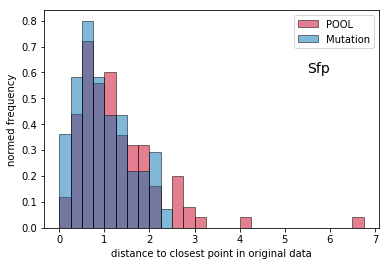

In [95]:
bins = np.arange(7,step=0.25)
plt.hist(pool_sfp['closest_data_dist'],bins,density=True,alpha=0.5,color=pool_col,histtype='bar', ec='black')
plt.hist(mutation_sfp['closest_data_dist'],bins,density=True,alpha=0.5,color=mutation_col,histtype='bar', ec='black')
plt.legend(['POOL','Mutation'])
plt.xlabel('distance to closest point in original data')
plt.ylabel('normed frequency')
plt.text(5.5,0.6, 'Sfp',fontsize=14)
plt.savefig('fig3e.pdf',transparent=True)

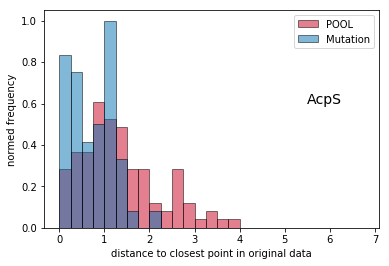

In [96]:
bins = np.arange(7,step=0.25)
plt.hist(pool_acps['closest_data_dist'],bins,density=True,alpha=0.5,color=pool_col,histtype='bar', ec='black')
plt.hist(mutation_acps['closest_data_dist'],bins,density=True,alpha=0.5,color=mutation_col,histtype='bar', ec='black')
plt.legend(['POOL','Mutation'])
plt.xlabel('distance to closest point in original data')
plt.ylabel('normed frequency')
plt.text(5.5,0.6, 'AcpS',fontsize=14)
plt.savefig('fig3f.pdf',transparent=True)